In [ ]:
#<start>only for colab users

In [1]:
# https://github.com/rcmalli/keras-vggface
!pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-_dvmsukn
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-_dvmsukn
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=f7ebdb2be64fd8429548ccfaca7865e4da3ffa7c324e57903d52caa86238c6ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-kvgxsksl/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [6]:
!pip install keras_vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir images

In [3]:
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/1.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/2.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/3.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/ajb.jpg -P images

--2023-05-23 20:16:11--  https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/1.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/1.jpg [following]
--2023-05-23 20:16:12--  https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13806 (13K) [image/jpeg]
Saving to: ‘images/1.jpg’

1.jpg               100%[===================>]  13.48K  --.-KB/s    in 0s      

2023-05-23 20:16:12 (62.4 MB/s) - ‘images/1.jpg’ saved [13806/13806]

--2023-05-

In [ ]:
#<end>only for colab users

In [9]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00


In [10]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [11]:
model = VGGFace() # default : VGG16 , you can use model='resnet50' or 'senet50'

580070376/580070376 [==============================] - 8s 0us/step


In [21]:
model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

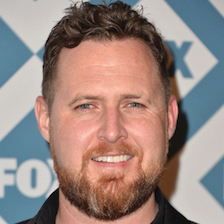

In [15]:
# Change the image path with yours.
img = image.image_utils.load_img('./images/ajb.jpg', target_size=(224, 224))
img

In [17]:
x = image.image_utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1) # or version=2
preds = model.predict(x)
print('Predicted:', utils.decode_predictions(preds))

346184/346184 [==============================] - 1s 2us/step
Predicted: [[["b'A.J._Buckley'", 0.97900933], ["b'David_Denman'", 0.0014457274], ["b'Carmine_Giovinazzo'", 0.0008676499], ["b'Robert_Buckley'", 0.0007245657], ["b'Eddie_Cahill'", 0.0004183299]]]


In [25]:
x.shape

(1, 224, 224, 3)

In [24]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

58909280/58909280 [==============================] - 2s 0us/step


In [26]:
vgg_features.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [32]:
emb = vgg_features.predict(x)
emb.shape

1/1 [==============================] - 1s 576ms/step


(1, 512)

لود تصاویر از دیسک

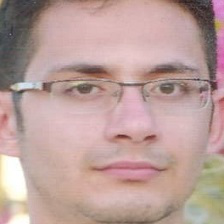

In [30]:
#read images
img1 = image.image_utils.load_img('./images/1.jpg', target_size=(224, 224))
img1

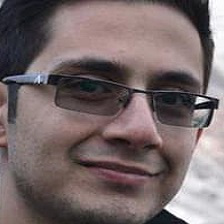

In [28]:
img2 = image.image_utils.load_img('./images/2.jpg', target_size=(224, 224))
img2

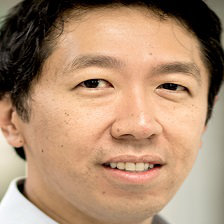

In [29]:
img3 =image.image_utils.load_img('./images/3.jpg', target_size=(224, 224))
img3

In [31]:
def get_embedding(img):
    x = image.image_utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1) # or version=2
    emb = vgg_features.predict(x)
    return emb

In [33]:
emb1 = get_embedding(img1)
emb2 = get_embedding(img2)
emb3 = get_embedding(img3)

1/1 [==============================] - 0s 454ms/step


In [34]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [35]:
verification_threshhold = 100

In [36]:
dist = findEuclideanDistance(emb1, emb2)
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findEuclideanDistance(emb1, emb3)
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 64.33698  issame = True
distance img1 and img2 = 114.09243  issame = False


In [37]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [38]:
verification_threshhold = 0.4

In [39]:
dist = findCosineDistance(emb1[0], emb2[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findCosineDistance(emb1[0], emb3[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 0.16922688484191895  issame = True
distance img1 and img2 = 0.44629234075546265  issame = False


sources:

    https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
    https://github.com/rcmalli/keras-vggface